<a href="https://colab.research.google.com/github/ayoubbensakhria/finance_algo/blob/master/MA_and_Momentum_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moving Average

Moving average is a series of averages points between many fixed subsets of a dataset. 

## Simple Moving Average
The unweighted mean of the previous k data-points.

\begin{aligned}
S M A_{k} &=\frac{p_{n-k+1}+p_{n-k+2} \cdots+p_{n}}{k} \\
&=\frac{1}{k} \sum_{i=n-k+1}^{n} p_{i}
\end{aligned}

## Cumulative Moving Average
The data arrive in an ordered datum stream, and the user would like to get the average of all of the data up until the current datum
\begin{aligned}
C M A_{n+1} &=\frac{x_{n+1}+n \cdot C M A_{n}}{n+1} \\
&=\frac{x_{n+1}+(n+1-1) \cdot C M A_{n}}{n+1} \\
&=\frac{(n+1) \cdot C M A_{n}+x_{n+1}-C M A_{n}}{n+1} \\
&=C M A_{n}+\frac{x_{n+1}-C M A_{n}}{n+1}
\end{aligned}

Where :
\begin{equation}
C M A_{n}=\frac{x_{1}+\cdots+x_{n}}{n}
\end{equation}

## Weighted Moving Average

The average that has multiplying factors to give different weights to data at different positions in the sample window. Mathematically, the weighted moving average is the convolution of the data with a fixed weighting function.

\begin{equation}
\mathrm{WMA}_{M}=\frac{n p_{M}+(n-1) p_{M-1}+\cdots+2 p_{((M-n)+2)}+p_{((M-n)+1)}}{n+(n-1)+\cdots+2+1}
\end{equation}

## Exponential Moving Average

The first-order infinite impulse response filter that applies weighting factors which decrease exponentially. The weighting for each older datum decreases exponentially, never reaching zero. The graph at right shows an example of the weight decrease.

$$
\mathrm{EMA}_{\text {today }}=\frac{p_{1}+(1-\alpha) p_{2}+(1-\alpha)^{2} p_{3}+(1-\alpha)^{3} p_{4}+\cdots}{1+(1-\alpha)+(1-\alpha)^{2}+(1-\alpha)^{3}+\cdots}
$$
since $1 / \alpha=1+(1-\alpha)+(1-\alpha)^{2}+\cdots$.

# Momentum
Momentum investing is a system of buying stocks or other securities that have had high returns over the past three to twelve months, and selling those that have had poor returns over the same period.

In [4]:
#backtrader
!pip install backtrader

     |████████████████████████████████| 410 kB 8.0 MB/s 


In [5]:
import math
from time import time
import pandas as pd
import numpy as np
import backtrader as bt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

# Vizualise the Stock Price Over Time

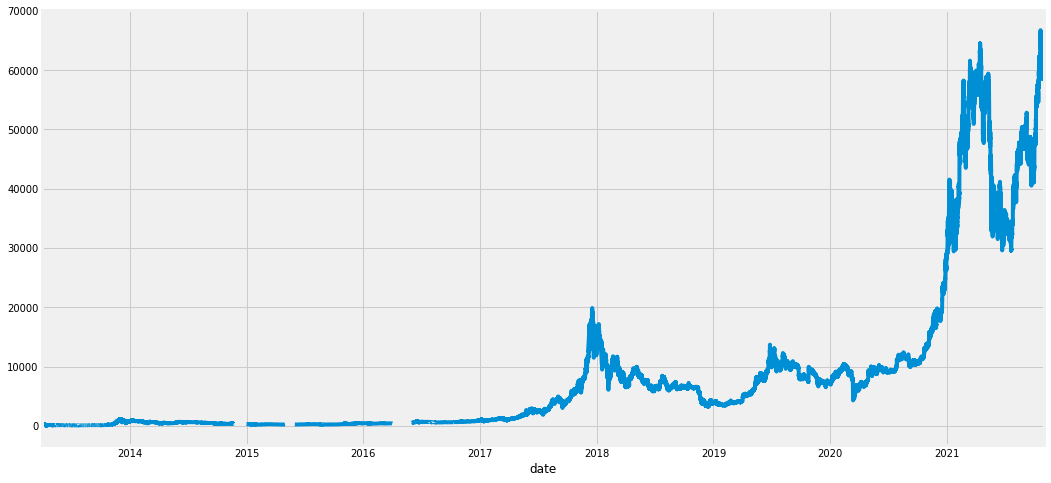

In [2]:
#read data
df = pd.read_csv('/content/drive/MyDrive/Yoctobe Fintech/Datasets/btcusd30mn.csv', parse_dates=True)
df.head()
# #setting index as date because some statsmodels might not work
df.rename(columns={'datetime': 'date'}, inplace=True)
df.index = df['date']
df.index = pd.to_datetime(df.index)
#plot
df['close'].plot(figsize=(16,8))

In [7]:
# Calculate the momentum
def calculate_momentum(data):
  log_data = np.log(data)
  # get the xs
  x_data = np.arange(len(log_date))
  beta, _, rvalue, _, _ = linregress(x_data, x_date)
  # annualize the slope
  return (1+beta)**252 * (rvalue **2)

In [ ]:
# Momentum class
class Momentum(bt.Indicator):
  lines = ('momentum_trend',)
  params = (('period', 90),)

  def __init__(self):
    self.add_min_period = self.params.period
  
  def next(self):
    returns = np.log(self.data.get(size = self.params.period)
    x_data = np.arange(len(log_date))
    beta, _, rvalue, _, _ = linregress(x_data, x_date)
    # annualize the slope
    annualized = (1+beta)**252 
    # actual value of the momentum
    self.lines.momentum_trend[0] = annualized * rvalue**2

class MomentumStrategy(bt.Strategy):

  def __init__(self):
    self.counter = 0
    self.indicators = {}
    self.sorted_data = []
    self.btc = self.data[0] 
    self.sma200 = bt.indicators.MovingAverageSimple(self.btc.close, period = 200)
